# Group 1
Python 期末

In [1]:
## package load
import os
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import shutil
import util
from util import get_dummies, detect_str_columns,model_testRF,results_summary_to_dataframe,plot_confusion_matrix,logistic_model,logistic_importance,logistic_conf,model_profit_fun,model_profit_newdata_fun
from util import profit_linechart, profit_linechart_all
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier

In [2]:
## Data load
train_data= pd.read_csv('bank_train.csv', encoding='utf-8-sig')
test_data = pd.read_csv('bank_test.csv', encoding= 'utf-8-sig')

In [3]:
## keep the UID for each file
UID_train= train_data['UID']
UID_test = test_data['UID']

In [4]:
## Delete the UID for each file
del train_data['UID']
del test_data['UID']

In [5]:
## Y_data
Y_train= train_data['buy']
X_train= train_data.drop(columns='buy')
Y_test= test_data['buy']
X_test= test_data.drop(columns='buy')

In [6]:
## Replace 'Yes' -> 1/ 'No' -> 0
X_train = X_train.replace({'yes':1, 'no':0})
X_test  = X_test.replace({'yes':1, 'no':0})

In [7]:
## Str data 
str_columns=[]

for i in X_train.columns:
    if X_train[i].dtype == object:
        str_columns.append(i)

str_columns

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [8]:
## One-hot Encoding
X_train = pd.get_dummies(X_train[str_columns])
X_test  = pd.get_dummies(X_test[str_columns])

In [9]:
X_train_S = MinMaxScaler().fit_transform(X_train)
X_test_S  = MinMaxScaler().fit_transform(X_test)

## Linear Regression Model

################ summary ################ 
[[7850  130]
 [ 877  186]]
Training Accuracy = 0.893
Test Accuracy = 0.889
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $793424
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  1250  1063  1328750
2  單品行銷費用   312  9043  2821416
3      利潤     -     -  -482816
全市場行銷利潤矩陣.csv saved
------------------LogisticRegression模型行銷利潤矩陣------------------
       項目    金額 目標對象      小計
0    單品價格  3450  186  641700
1  單品營業成本  1250  186  232500
2  單品行銷費用   312  316   98592
3      利潤     -    -  310608
模型行銷利潤矩陣.csv saved


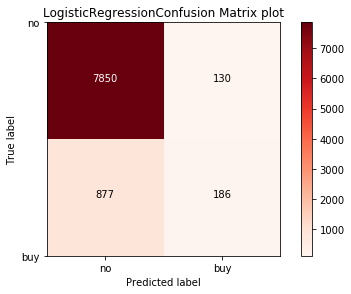

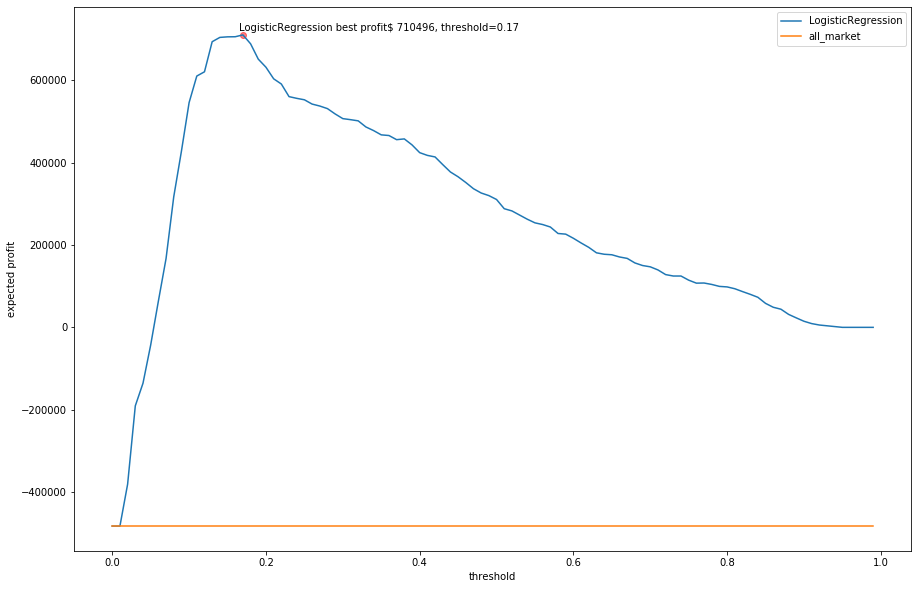

(17    0.17
 Name: 閥值, dtype: float64,
 710496)

In [10]:
# Logestic model
LR_all_df, LR_model_profit_df, LR_y_test_df = model_profit_fun(
        clf = LogisticRegression(random_state=0), # sklearn的模型
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'LogisticRegression')

profit_linechart(
    y_test_df=LR_y_test_df,
    sales_price = 3450,
    marketing_expense = 312,
    product_cost = 1250,
    plot_name = 'LogisticRegression')

In [11]:
from util import move_file
move_file(dectect_name = 'LogisticRegression', folder_name = 'LogisticRegression_利潤結果')

## XGBoost Model

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[21:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
################ summary ################ 
[[7784  196]
 [ 823  240]]
Training Accuracy = 0.907
Test Accuracy = 0.887
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $874784
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  

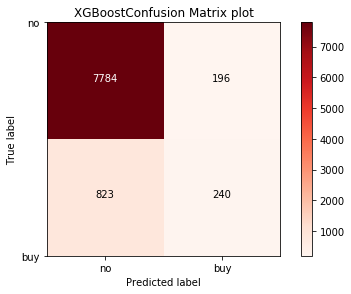

In [12]:
XGB_all_df, XGB_model_profit_df, XGB_y_test_df = model_profit_fun(
        clf = XGBClassifier(n_estimators=300 ,random_state = 0,nthread = 8), # sklearn的模型
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'XGBoost') 

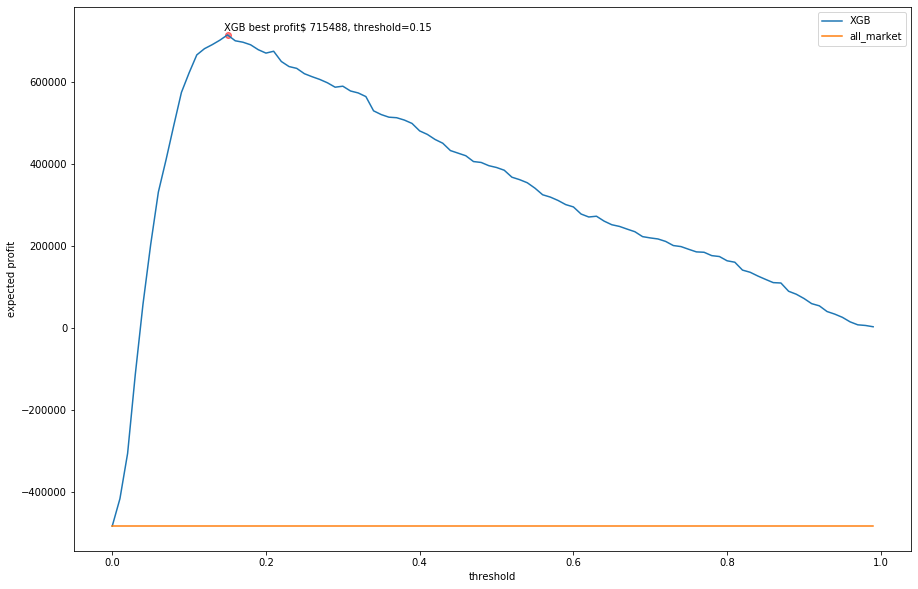

(15    0.15
 Name: 閥值, dtype: float64,
 715488)

In [13]:
profit_linechart(
        y_test_df=XGB_y_test_df,
        sales_price = 3450,
        marketing_expense = 312,
        product_cost = 1250,
        plot_name = 'XGB')

In [14]:
move_file(dectect_name = 'XGB', folder_name = 'XGB_利潤結果')

## Random Forest

################ summary ################ 
[[7770  210]
 [ 831  232]]
Training Accuracy = 0.911
Test Accuracy = 0.885
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $855312
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  1250  1063  1328750
2  單品行銷費用   312  9043  2821416
3      利潤     -     -  -482816
全市場行銷利潤矩陣.csv saved
------------------Random_Forest Model模型行銷利潤矩陣------------------
       項目    金額 目標對象      小計
0    單品價格  3450  232  800400
1  單品營業成本  1250  232  290000
2  單品行銷費用   312  442  137904
3      利潤     -    -  372496
模型行銷利潤矩陣.csv saved


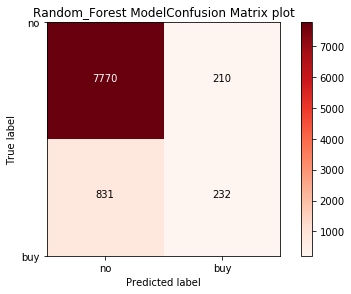

In [15]:
RF_all_df, RF_model_profit_df, RF_y_test_df = model_profit_fun(
        clf=RandomForestClassifier(n_estimators = 100, random_state = 0), # sklearn的模型
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'Random_Forest Model') # 產出結果的名稱，會存到資料夾

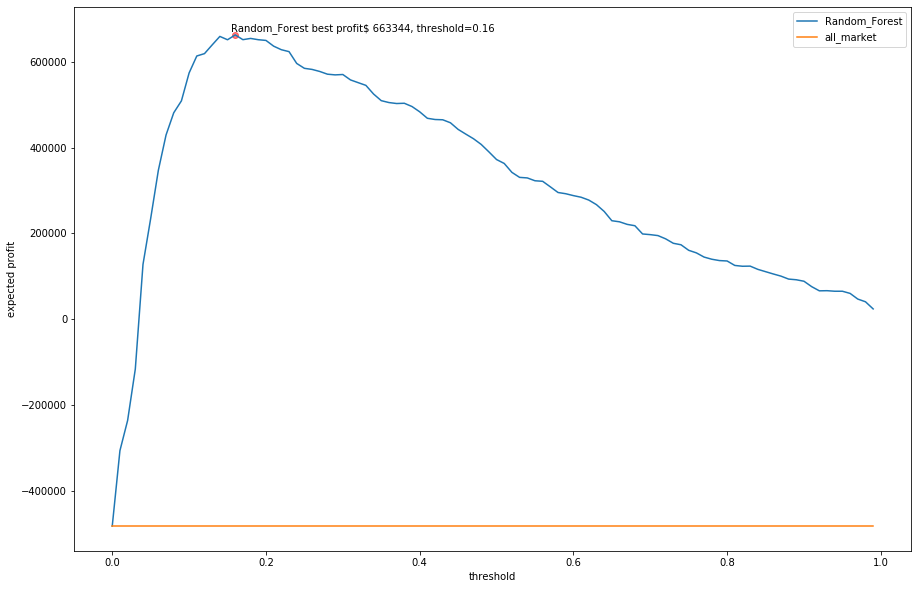

(16    0.16
 Name: 閥值, dtype: float64,
 663344)

In [16]:
profit_linechart(
        y_test_df= RF_y_test_df,
        sales_price = 3450,
        marketing_expense = 312,
        product_cost = 1250,
        plot_name = 'Random_Forest')

In [17]:
move_file(dectect_name = 'Random_Forest', folder_name = 'RF_利潤結果')

# SVM Method

################ summary ################ 
[[7841  139]
 [ 853  210]]
Training Accuracy = 0.895
Test Accuracy = 0.890
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $835928
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  1250  1063  1328750
2  單品行銷費用   312  9043  2821416
3      利潤     -     -  -482816
全市場行銷利潤矩陣.csv saved
------------------SVM模型行銷利潤矩陣------------------
       項目    金額 目標對象      小計
0    單品價格  3450  210  724500
1  單品營業成本  1250  210  262500
2  單品行銷費用   312  349  108888
3      利潤     -    -  353112
模型行銷利潤矩陣.csv saved


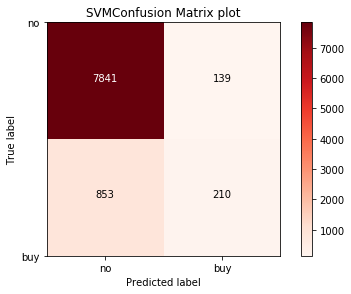

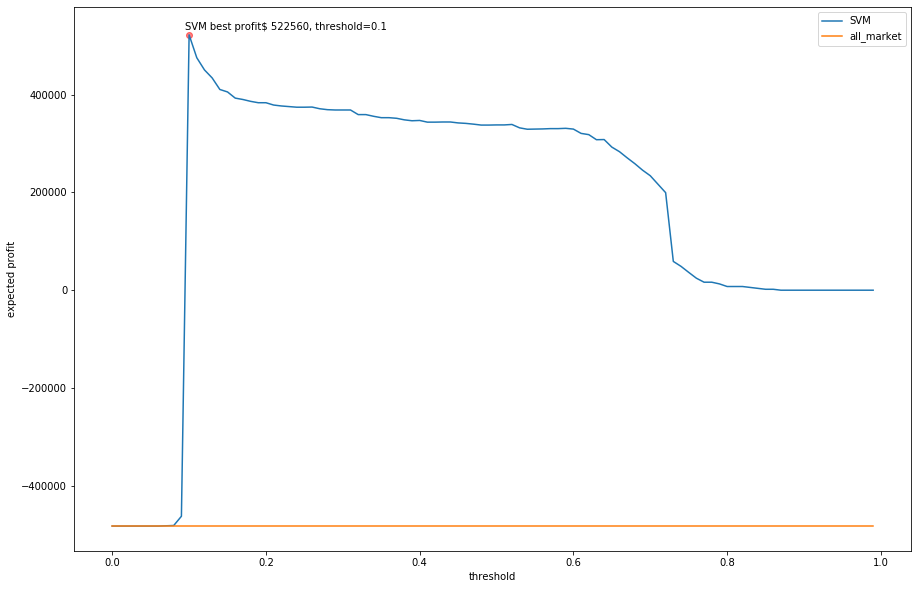

(10    0.1
 Name: 閥值, dtype: float64,
 522560)

In [18]:
SVM_all_df, SVM_model_profit_df, SVM_y_test_df = model_profit_fun(
        clf = SVC(kernel='rbf', probability=True,random_state=0), # sklearn的模型
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'SVM')

profit_linechart(
    y_test_df=SVM_y_test_df,
    sales_price = 3450,
    marketing_expense = 312,
    product_cost = 1250,
    plot_name = 'SVM')

In [19]:
move_file(dectect_name = 'SVM', folder_name = 'SVM_利潤結果')

# Gradient Boosting Classifier

################ summary ################ 
[[7852  128]
 [ 856  207]]
Training Accuracy = 0.896
Test Accuracy = 0.891
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $833696
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  1250  1063  1328750
2  單品行銷費用   312  9043  2821416
3      利潤     -     -  -482816
全市場行銷利潤矩陣.csv saved
------------------GBoost_model模型行銷利潤矩陣------------------
       項目    金額 目標對象      小計
0    單品價格  3450  207  714150
1  單品營業成本  1250  207  258750
2  單品行銷費用   312  335  104520
3      利潤     -    -  350880
模型行銷利潤矩陣.csv saved


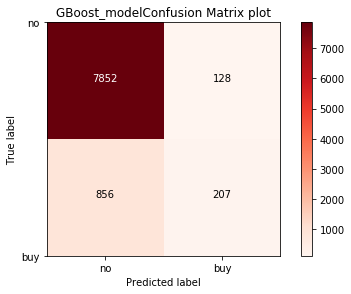

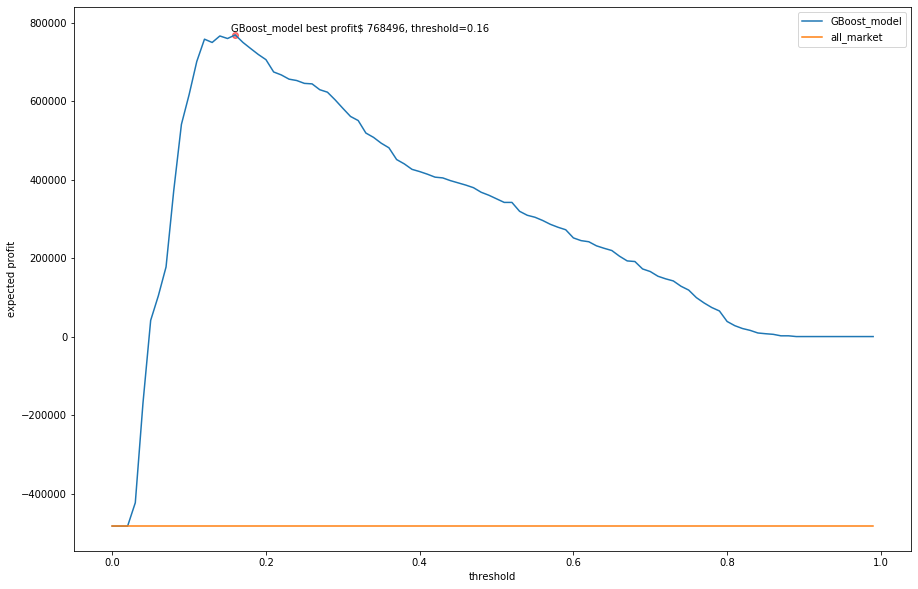

(16    0.16
 Name: 閥值, dtype: float64,
 768496)

In [20]:
gbst_all_df, gbst_model_profit_df, gbst_y_test_df = model_profit_fun(
        clf = GradientBoostingClassifier(random_state=0), # sklearn的模型
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'GBoost_model')

profit_linechart(
    y_test_df=gbst_y_test_df,
    sales_price = 3450,
    marketing_expense = 312,
    product_cost = 1250,
    plot_name = 'GBoost_model')

In [21]:
move_file(dectect_name = 'GBoost', folder_name = 'GBoost_利潤結果')

# Stacking

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[22:02:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
################ summary ################ 
[[7754  226]
 [ 821  242]]
Training Accuracy = 0.911
Test Accuracy = 0.884
------------------模型相對權市場行銷來說【賺錢】------------------
模型比全市場行銷賺 $869200
------------------全市場行銷利潤矩陣------------------
       項目    金額  目標對象       小計
0    單品價格  3450  1063  3667350
1  單品營業成本  

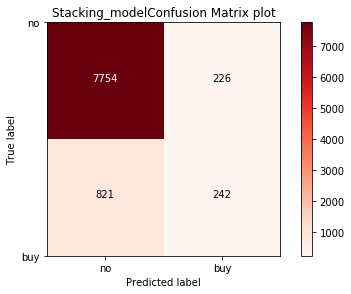

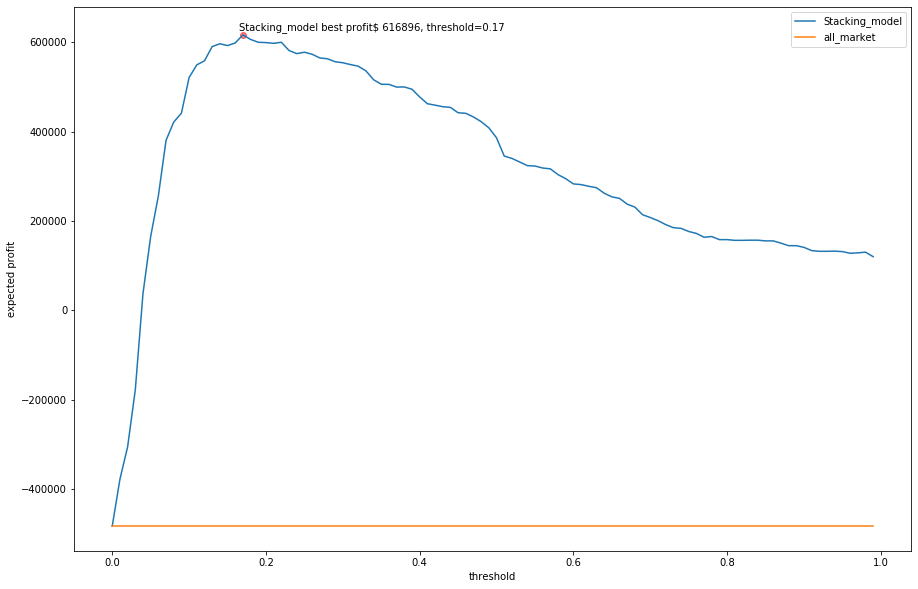

(17    0.17
 Name: 閥值, dtype: float64,
 616896)

In [22]:
estimater=[LogisticRegression(random_state=0), GradientBoostingClassifier(random_state=0), RandomForestClassifier(n_estimators = 100, random_state = 0)]

ST_all_df, ST_model_profit_df, ST_y_test_df = model_profit_fun(
        clf = StackingClassifier(classifiers=[LogisticRegression(random_state=0), GradientBoostingClassifier(random_state=0), RandomForestClassifier(n_estimators = 100, random_state = 0)],use_probas=True,average_probas=False,meta_classifier=XGBClassifier(n_estimators=300 ,random_state = 0,nthread = 8)),
        X_train=X_train_S, # 訓練資料集 X：training set (x)
        y_train=Y_train, # 訓練資料集 Y：training set (buy)
        X_test=X_test_S, # 測試資料集 X : testing set (x)
        y_test=Y_test, # 測試資料集 Y : testing set (buy)
        sales_price = 3450, # 價格
        marketing_expense = 312, # 行銷成本
        product_cost = 1250, # 產品成本
        plot_name = 'Stacking_model')

profit_linechart(
    y_test_df=ST_y_test_df,
    sales_price = 3450,
    marketing_expense = 312,
    product_cost = 1250,
    plot_name = 'Stacking_model')

In [23]:
move_file(dectect_name = 'Stacking', folder_name = 'Stacking_利潤結果')

# 疊圖

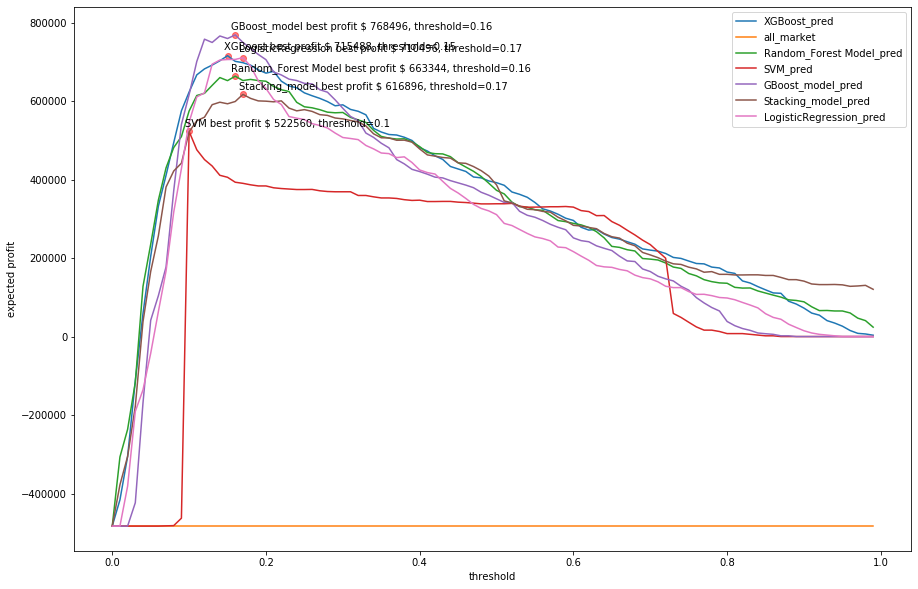

In [24]:
profit_linechart_all(y_test_df= [XGB_y_test_df,
                                 RF_y_test_df,
                                 SVM_y_test_df,
                                 gbst_y_test_df,
                                 ST_y_test_df,
                                 LR_y_test_df] ,
                    sales_price = 3450,
                    marketing_expense = 312,
                    product_cost = 1250)

## Decision tree

In [33]:
train_data_D= pd.read_csv('bank_train.csv', encoding='utf-8-sig')
UID_train_D= train_data_D['UID']
del train_data_D['UID']
del train_data_D['day']
del train_data_D['month']
##del train_data_D['contact']
Y_train_D= train_data_D['buy']
X_train_D= train_data_D.drop(columns='buy')
X_train_D = X_train_D.replace({'yes':1, 'no':0})

In [34]:
str_columns=[]

for i in X_train_D.columns:
    if X_train_D[i].dtype == object:
        str_columns.append(i)

str_columns

['job', 'marital', 'education', 'contact', 'poutcome']

In [35]:
X_train = pd.get_dummies(X_train_D[str_columns])

In [36]:
# 導入套件
from sklearn.tree import DecisionTreeClassifier
# 命名模型物件
decision_reg = DecisionTreeClassifier(max_leaf_nodes = 7, 
                                      max_depth= 5,
                                      criterion = 'entropy',
                                      random_state=5)

decision_reg.fit(X_train, Y_train_D)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [37]:
#conda install python-graphviz
from sklearn import tree
import graphviz 
import os
import platform

if platform.system() ==  'Windows':
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    
dot_data = tree.export_graphviz(decision_reg, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['no','yes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('marketing_entropy')

'marketing_entropy.pdf'

In [38]:
# 導入套件
from sklearn.tree import DecisionTreeClassifier
# 命名模型物件
decision_reg = DecisionTreeClassifier(max_leaf_nodes = 7, 
                                      max_depth= 5,
                                      criterion = 'gini',
                                      random_state=0)

decision_reg.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
#conda install python-graphviz
from sklearn import tree
import graphviz 
import os
import platform

if platform.system() ==  'Windows':
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    
dot_data = tree.export_graphviz(decision_reg, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['no','yes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('marketing_gini')

'marketing_gini.pdf'

In [40]:
move_file(dectect_name = 'market', folder_name = 'Decision_Tree_利潤結果')